In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesOther_pn', normalize=True, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.773 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.506 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.060 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.054 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.620 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=6.368 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.209 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

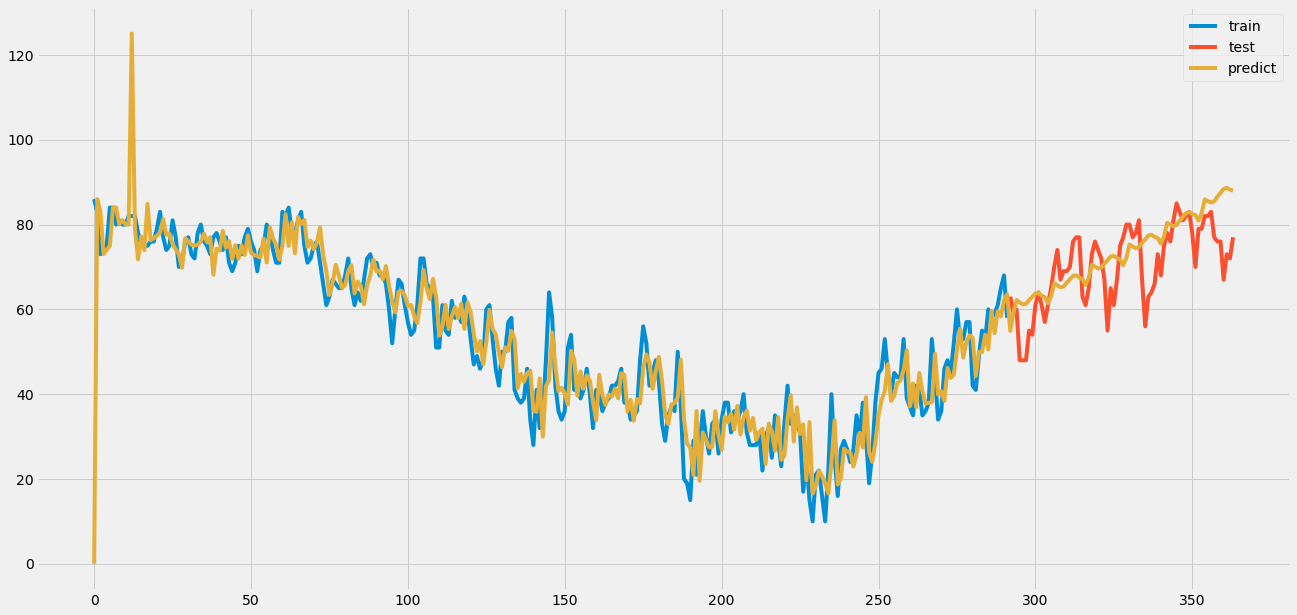

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.18287671233  Num NaN: 0'

'Test Error: 4.94166666667    Num NaN: 0'

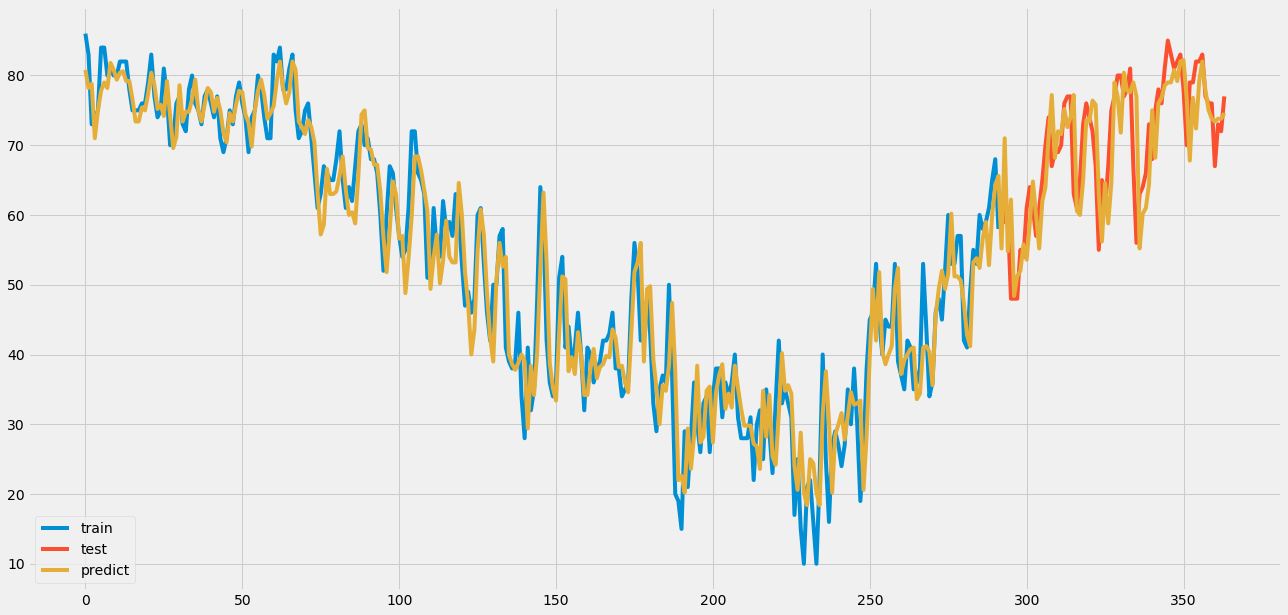

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 6.12479990685  Num NaN: 0'

'Test Error: 6.13351023112    Num NaN: 0'

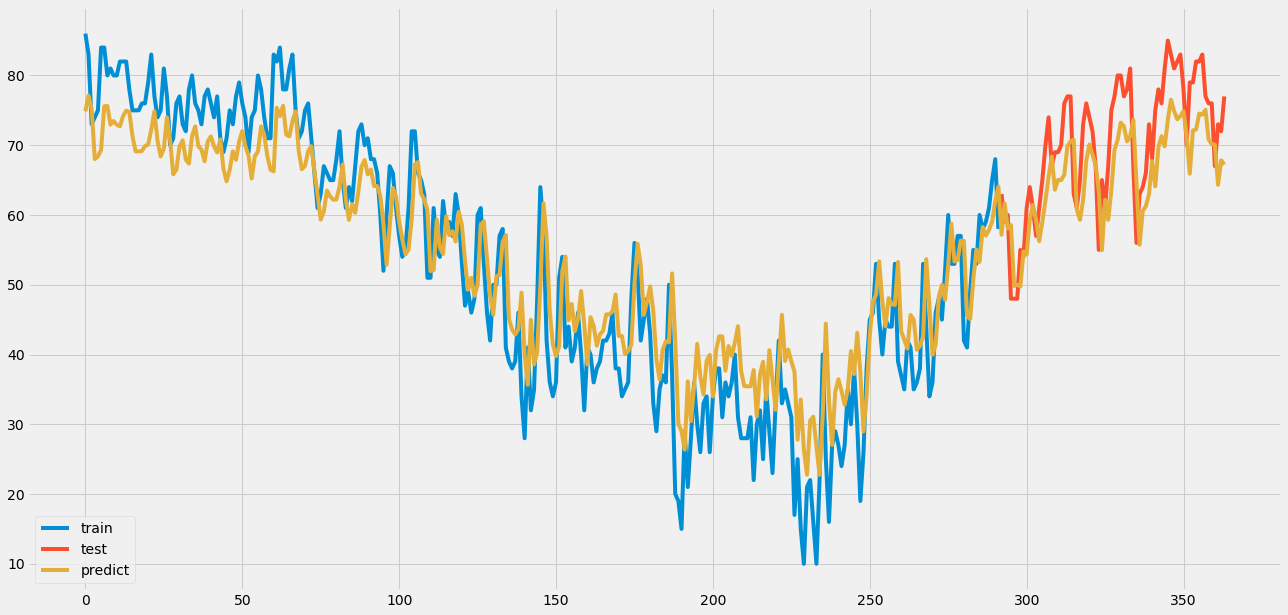

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 2.09466894977  Num NaN: 0'

'Test Error: 4.96111111111    Num NaN: 0'

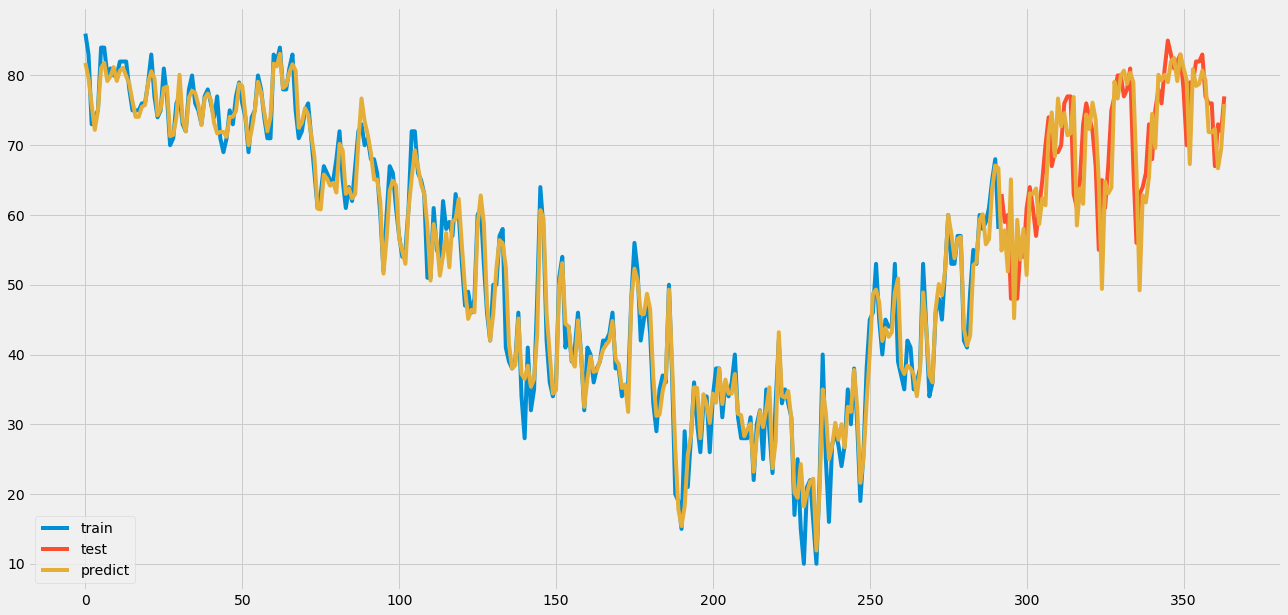

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.40285939278  Num NaN: 0'

'Test Error: 4.97189537288    Num NaN: 0'

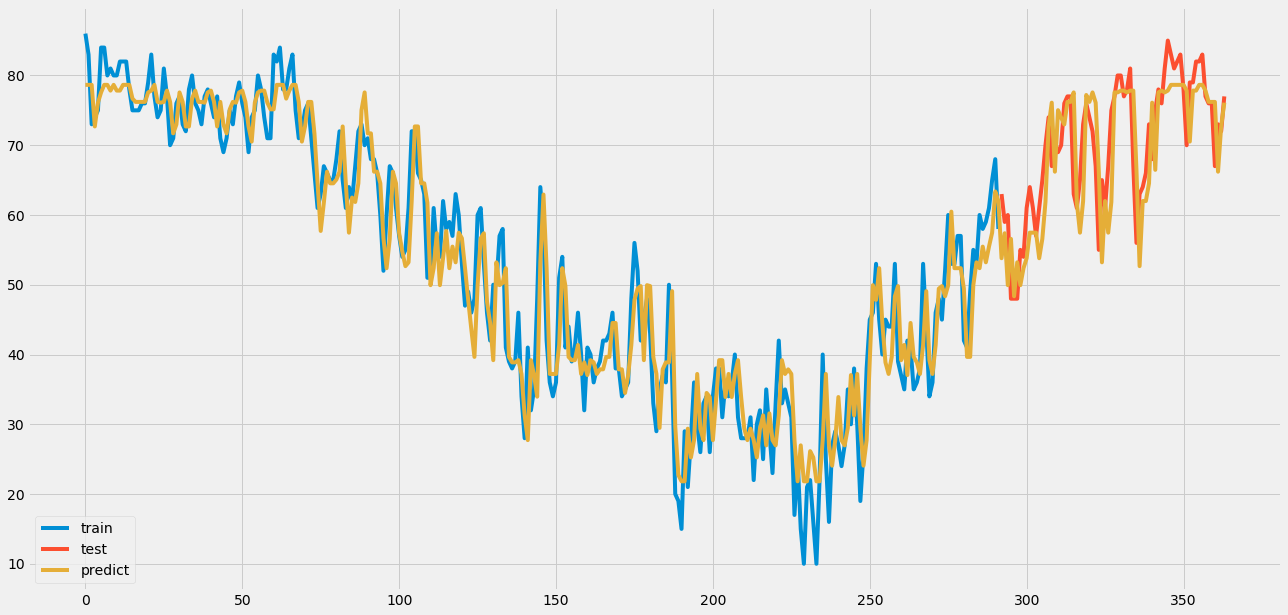

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 3.39901226514  Num NaN: 0'

'Test Error: 21.7833137512    Num NaN: 0'

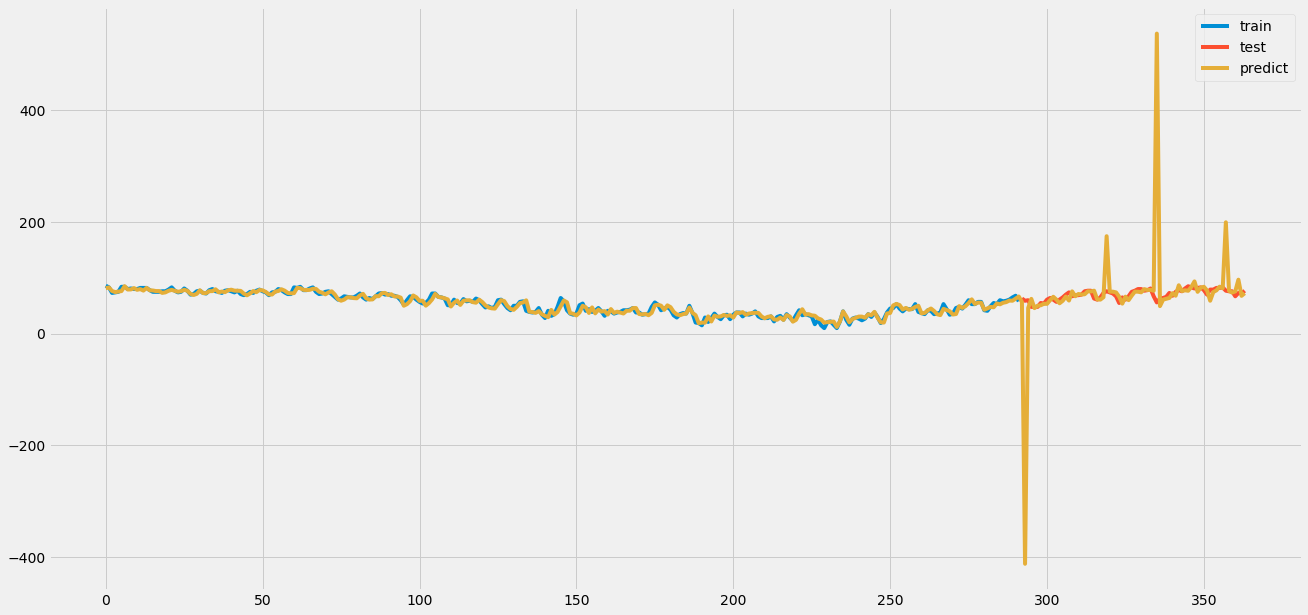

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.57814052236  Num NaN: 5'

'Test Error: 6.24115874309    Num NaN: 5'

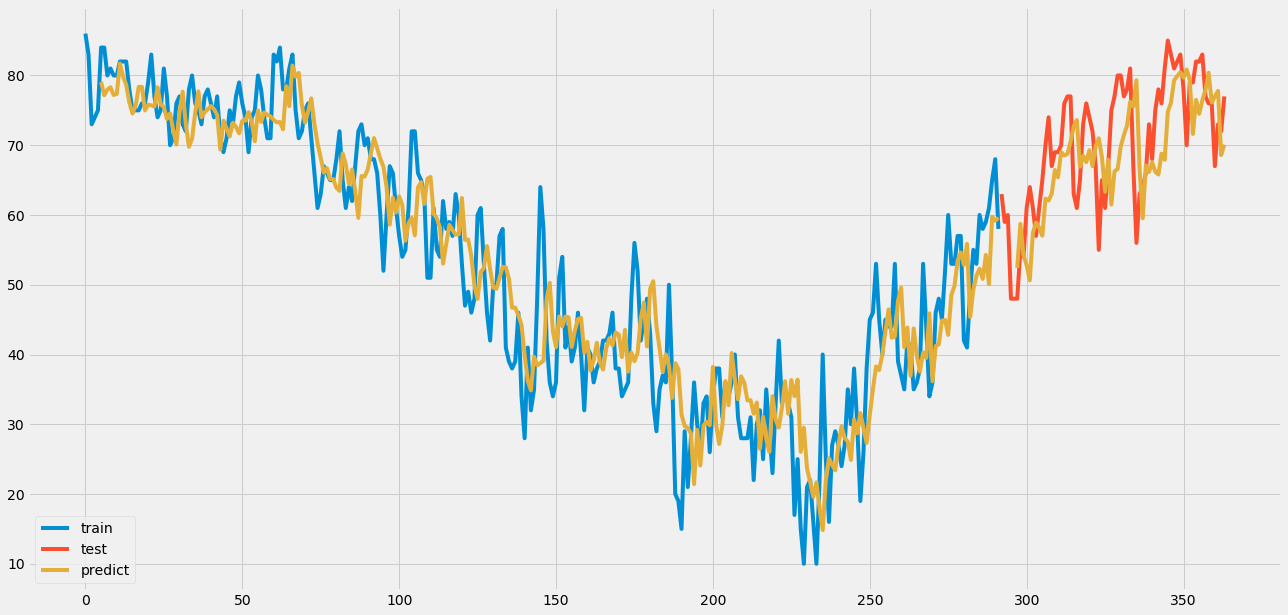

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.1512 - val_loss: 0.1736
Epoch 2/10
 - 0s - loss: 0.1319 - val_loss: 0.1197
Epoch 3/10
 - 0s - loss: 0.1233 - val_loss: 0.1222
Epoch 4/10
 - 0s - loss: 0.1200 - val_loss: 0.1169
Epoch 5/10
 - 0s - loss: 0.1167 - val_loss: 0.1249
Epoch 6/10
 - 0s - loss: 0.1148 - val_loss: 0.1147
Epoch 7/10
 - 0s - loss: 0.1136 - val_loss: 0.0978
Epoch 8/10
 - 0s - loss: 0.1127 - val_loss: 0.1060
Epoch 9/10
 - 0s - loss: 0.1094 - val_loss: 0.1077
Epoch 10/10
 - 0s - loss: 0.1095 - val_loss: 0.1034


'Train Error: 8.03457330661  Num NaN: 5'

'Test Error: 7.75195141693    Num NaN: 5'

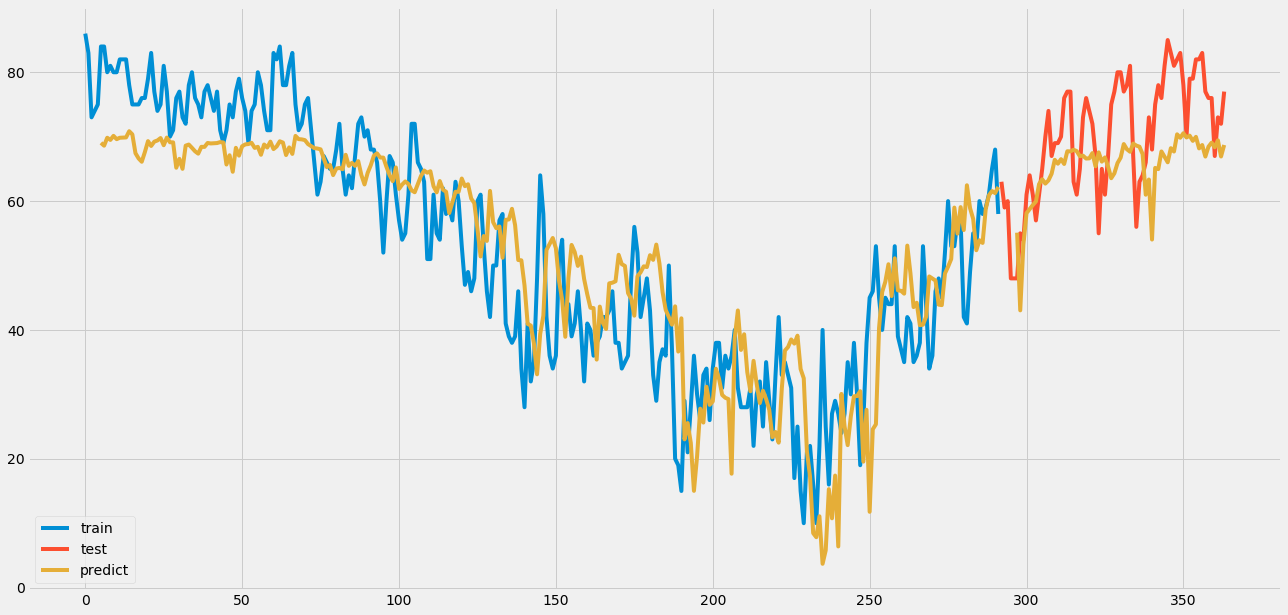

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2554 - val_loss: 0.3150
Epoch 2/10
 - 0s - loss: 0.2338 - val_loss: 0.3068
Epoch 3/10
 - 0s - loss: 0.2408 - val_loss: 0.1386
Epoch 4/10
 - 0s - loss: 0.2471 - val_loss: 0.4130
Epoch 5/10
 - 0s - loss: 0.2383 - val_loss: 0.1371
Epoch 6/10
 - 0s - loss: 0.2568 - val_loss: 0.5155
Epoch 7/10
 - 0s - loss: 0.2413 - val_loss: 0.1318
Epoch 8/10
 - 0s - loss: 0.2394 - val_loss: 0.0954
Epoch 9/10
 - 0s - loss: 0.2382 - val_loss: 0.4164
Epoch 10/10
 - 0s - loss: 0.2352 - val_loss: 0.3776


'Train Error: 17.2166564224  Num NaN: 5'

'Test Error: 28.3222623797    Num NaN: 5'

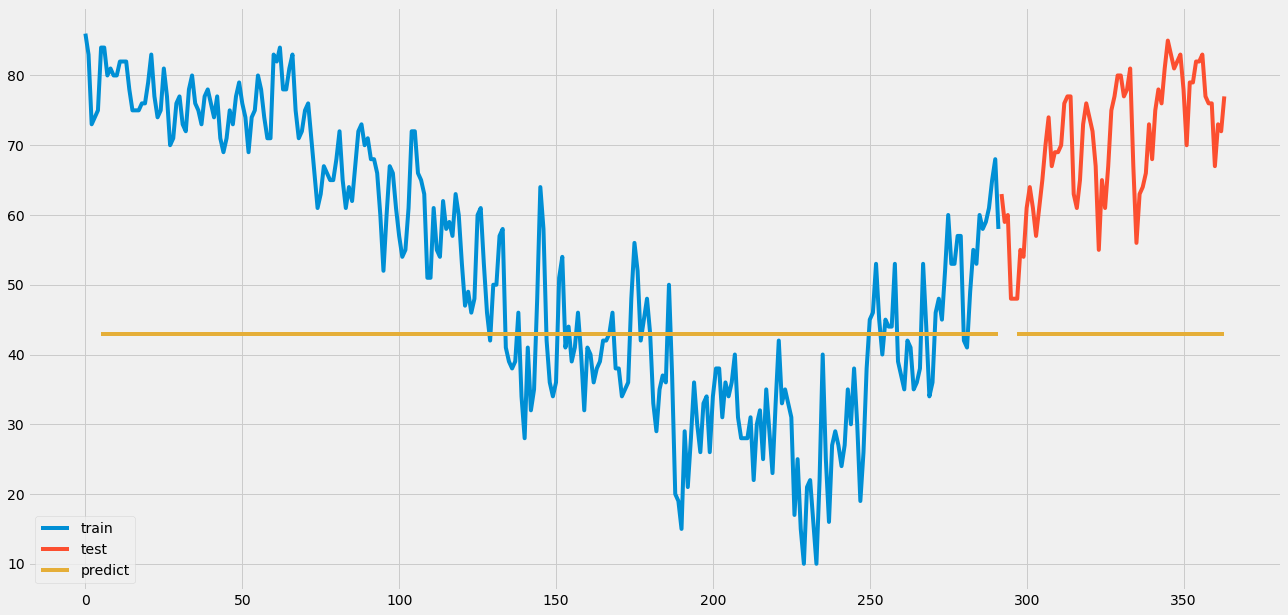

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.9889 - val_loss: 0.9680
Epoch 2/10
 - 0s - loss: 0.9579 - val_loss: 0.9304
Epoch 3/10
 - 0s - loss: 0.9247 - val_loss: 0.8837
Epoch 4/10
 - 0s - loss: 0.8398 - val_loss: 0.6690
Epoch 5/10
 - 0s - loss: 0.6596 - val_loss: 0.4891
Epoch 6/10
 - 0s - loss: 0.5202 - val_loss: 0.3651
Epoch 7/10
 - 0s - loss: 0.4134 - val_loss: 0.2841
Epoch 8/10
 - 0s - loss: 0.3363 - val_loss: 0.2305
Epoch 9/10
 - 0s - loss: 0.2793 - val_loss: 0.1920
Epoch 10/10
 - 0s - loss: 0.2364 - val_loss: 0.1627


'Train Error: 2172.93285169  Num NaN: 0'

'Test Error: 1643.36026213    Num NaN: 0'

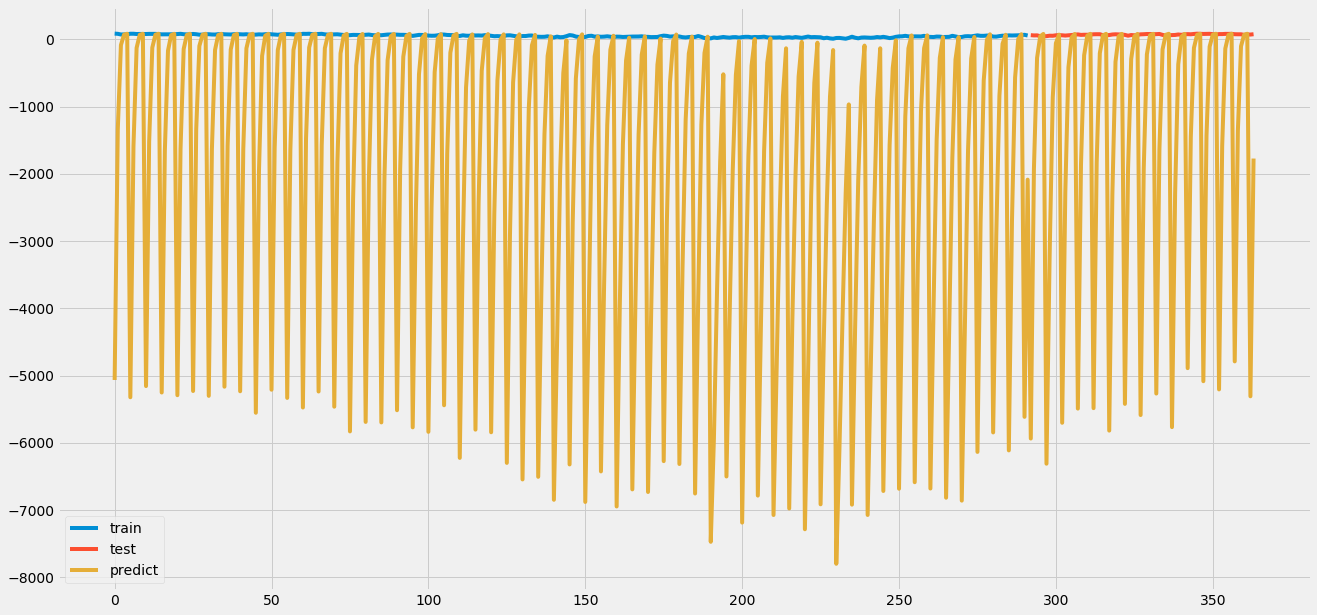

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.2457 - val_loss: 1.1737
Epoch 2/10
 - 1s - loss: 1.1125 - val_loss: 0.9348
Epoch 3/10
 - 1s - loss: 0.9229 - val_loss: 0.6909
Epoch 4/10
 - 1s - loss: 0.7282 - val_loss: 0.4963
Epoch 5/10
 - 1s - loss: 0.5604 - val_loss: 0.3416
Epoch 6/10
 - 1s - loss: 0.4143 - val_loss: 0.2285
Epoch 7/10
 - 1s - loss: 0.2913 - val_loss: 0.1581
Epoch 8/10
 - 1s - loss: 0.1933 - val_loss: 0.1156
Epoch 9/10
 - 1s - loss: 0.1134 - val_loss: 0.0913
Epoch 10/10
 - 1s - loss: 0.0554 - val_loss: 0.0791


'Train Error: 280.370353255  Num NaN: 0'

'Test Error: 797.378543066    Num NaN: 0'

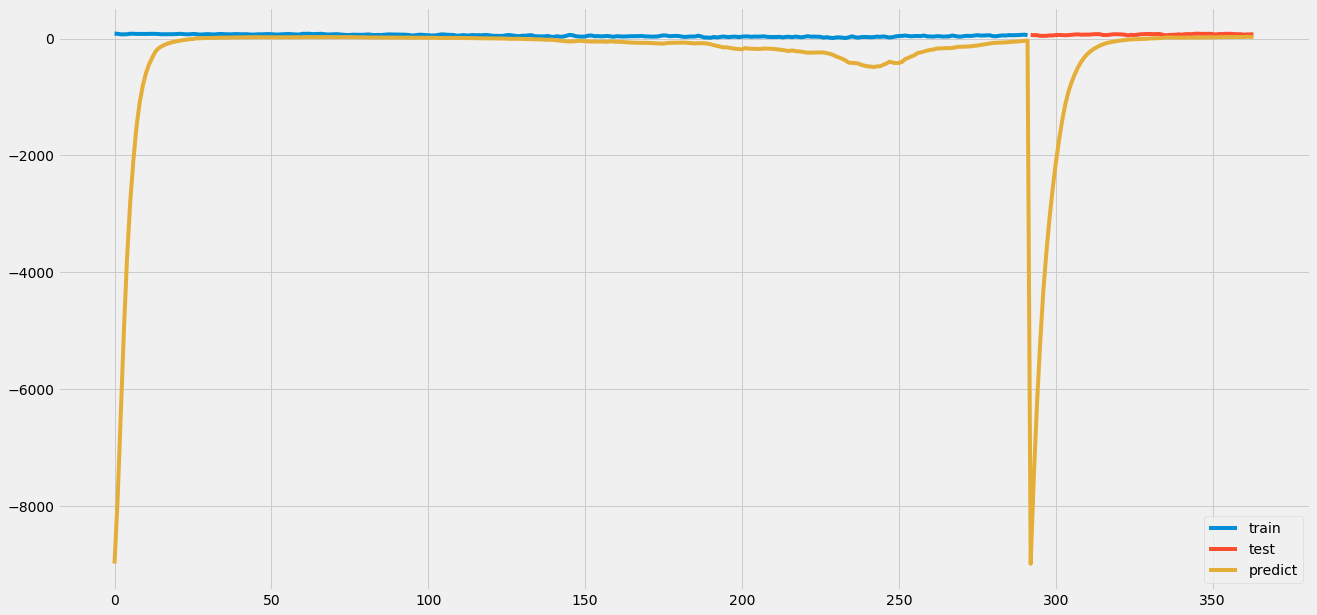

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')